http://datav.aliyun.com/tools/atlas/#&lat=33.50475906922609&lng=104.32617187499999&zoom=4<br>
https://stackoverflow.com/questions/55106744/how-do-you-convert-shapely-multipolygon-to-polygon

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date
from dateutil.relativedelta import relativedelta

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
from matplotlib.ticker import FuncFormatter

import geopandas
import folium
import branca.colormap as cm
from branca.element import Template, MacroElement

In [2]:
# mac os
font_path = '/Library/Fonts/simhei.ttf'
fontP = font_manager.FontProperties(fname=font_path)
fontP.set_size(14)

In [3]:
data_df = pd.read_csv('DXYArea.csv')
data_supplement = pd.read_csv('DXYArea_supplement.csv')
data_df = data_df[data_df['provinceName'] != '西藏自治区']
data_df = pd.concat([data_df, data_supplement]).reset_index(drop=True)

china_gdf = geopandas.read_file('china_geo.json', driver='JSON')
province_gdf = geopandas.read_file('province_geo.json', driver='JSON')

In [4]:
data_df['updateTime'] = data_df.updateTime.apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f'))
data_df['Date_ymd'] = data_df.updateTime.apply(lambda d: d.strftime('%Y-%m-%d'))
data_df['Time_hms'] = data_df.updateTime.apply(lambda d: d.strftime('%H:%M:%S'))

data_df = data_df.sort_values(by='updateTime')
data_df = data_df.reset_index(drop=True)

## Data cleaning

In [5]:
# 澳门特别行政区
data_df.loc[data_df['provinceName']=='澳门', 'provinceName'] = '澳门特别行政区'

# 上海市
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='嘉定'), 'cityName'] = '嘉定区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='奉贤'), 'cityName'] = '奉贤区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='宝山'), 'cityName'] = '宝山区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='徐汇'), 'cityName'] = '徐汇区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='杨浦'), 'cityName'] = '杨浦区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='松江'), 'cityName'] = '松江区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='虹口'), 'cityName'] = '虹口区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='金山'), 'cityName'] = '金山区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='长宁'), 'cityName'] = '长宁区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='闵行'), 'cityName'] = '闵行区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='青浦'), 'cityName'] = '青浦区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='静安'), 'cityName'] = '静安区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName']=='黄浦'), 'cityName'] = '黄浦区'
data_df.loc[(data_df['provinceName']=='上海市') & (data_df['cityName'].isin(['浦东', '浦东区'])), 'cityName'] = '浦东新区'

# 云南省
data_df.loc[(data_df['provinceName']=='云南省') & (data_df['cityName']=='丽江市'), 'cityName'] = '丽江'
data_df.loc[(data_df['provinceName']=='云南省') & (data_df['cityName']=='西双版纳州'), 'cityName'] = '西双版纳'

# 内蒙古自治区
data_df.loc[(data_df['provinceName']=='内蒙古自治区') & (data_df['cityName']=='乌海'), 'cityName'] = '乌海市'
data_df.loc[(data_df['provinceName']=='内蒙古自治区') & (data_df['cityName']=='通辽市经济开发区'), 'cityName'] = '通辽'
data_df.loc[(data_df['provinceName']=='内蒙古自治区') & (data_df['cityName']=='呼和浩特（新城区）'), 'cityName'] = '呼和浩特'
data_df.loc[(data_df['provinceName']=='内蒙古自治区') & (data_df['cityName']=='兴安盟乌兰浩特'), 'cityName'] = '兴安盟'
data_df.loc[(data_df['provinceName']=='内蒙古自治区') & (data_df['cityName'].isin(['包头市东河区', '包头市昆都仑区'])), 'cityName'] = '包头'
data_df.loc[(data_df['provinceName']=='内蒙古自治区') & (data_df['cityName'].isin(['赤峰市松山区', '赤峰市林西县'])), 'cityName'] = '赤峰'
data_df.loc[(data_df['provinceName']=='内蒙古自治区') & (data_df['cityName'].isin(['鄂尔多斯东胜区', '鄂尔多斯鄂托克前旗'])), 'cityName'] = '鄂尔多斯'
data_df.loc[(data_df['provinceName']=='内蒙古自治区') & (data_df['cityName'].isin(['锡林郭勒', '锡林郭勒盟二连浩特', '锡林郭勒盟锡林浩特'])), 'cityName'] = '锡林郭勒盟'
data_df.loc[(data_df['provinceName']=='内蒙古自治区') & (data_df['cityName'].isin(['满洲里', '呼伦贝尔满洲里', '呼伦贝尔牙克石', '呼伦贝尔牙克石市'])), 'cityName'] = '呼伦贝尔'

# 北京市
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='东城'), 'cityName'] = '东城区'
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='丰台'), 'cityName'] = '丰台区'
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='大兴'), 'cityName'] = '大兴区'
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='怀柔'), 'cityName'] = '怀柔区'
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='昌平'), 'cityName'] = '昌平区'
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='朝阳'), 'cityName'] = '朝阳区'
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='海淀'), 'cityName'] = '海淀区'
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='西城'), 'cityName'] = '西城区'
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='顺义'), 'cityName'] = '顺义区'
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='通州'), 'cityName'] = '通州区'
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='石景山'), 'cityName'] = '石景山区'
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='门头沟'), 'cityName'] = '门头沟区'
data_df.loc[(data_df['provinceName']=='北京市') & (data_df['cityName']=='武汉来京人员'), 'cityName'] = '外地来京人员'

# 吉林省
data_df.loc[(data_df['provinceName']=='吉林省') & (data_df['cityName']=='吉林'), 'cityName'] = '吉林市'
data_df.loc[(data_df['provinceName']=='吉林省') & (data_df['cityName']=='四平市'), 'cityName'] = '四平'

# 四川省
data_df.loc[(data_df['provinceName']=='四川省') & (data_df['cityName']=='凉山'), 'cityName'] = '凉山州'

# 天津市
data_df.loc[(data_df['provinceName']=='天津市') & (data_df['cityName']=='宁河'), 'cityName'] = '宁河区'
data_df.loc[(data_df['provinceName']=='天津市') & (data_df['cityName']=='外地来津'), 'cityName'] = '外地来津人员'

# 宁夏回族自治区
data_df.loc[(data_df['provinceName']=='宁夏回族自治区') & (data_df['cityName']=='宁东'), 'cityName'] = '宁东管委会'

# 安徽省
data_df.loc[(data_df['provinceName']=='安徽省') & (data_df['cityName']=='歙县'), 'cityName'] = '黄山'
data_df.loc[(data_df['provinceName']=='安徽省') & (data_df['cityName']=='宿松'), 'cityName'] = '安庆'

# 山东省
data_df.loc[(data_df['provinceName']=='山东省') & (data_df['cityName']=='淄博市'), 'cityName'] = '淄博'

# 山西省
data_df.loc[(data_df['provinceName']=='山西省') & (data_df['cityName']=='临汾市'), 'cityName'] = '临汾'
data_df.loc[(data_df['provinceName']=='山西省') & (data_df['cityName']=='朔州市'), 'cityName'] = '朔州'

# 广东省
data_df.loc[(data_df['provinceName']=='广东省') & (data_df['cityName']=='河源市'), 'cityName'] = '河源'
data_df.loc[(data_df['provinceName']=='广东省') & (data_df['cityName']=='外地来穗人员'), 'cityName'] = '外地来粤人员'

# 新疆维吾尔自治区
data_df.loc[(data_df['provinceName']=='新疆维吾尔自治区') & (data_df['cityName']=='吐鲁番市'), 'cityName'] = '吐鲁番'
data_df.loc[(data_df['provinceName']=='新疆维吾尔自治区') &
            (data_df['cityName'].isin(['第七师', '第九师', '第八师', '第八师石河子', '第八师石河子市', '第六师'])),
            'cityName'] = '石河子'

# 江苏省
data_df.loc[(data_df['provinceName']=='江苏省') & (data_df['cityName']=='待明确'), 'cityName'] = '待明确地区'

# 河北省
data_df.loc[(data_df['provinceName']=='河北省') & (data_df['cityName']=='邯郸市'), 'cityName'] = '邯郸'

# 河南省
data_df.loc[(data_df['provinceName']=='河南省') & (data_df['cityName']=='巩义'), 'cityName'] = '邓州'
data_df.loc[(data_df['provinceName']=='河南省') & (data_df['cityName']=='固始县'), 'cityName'] = '信阳'
data_df.loc[(data_df['provinceName']=='河南省') & (data_df['cityName']=='漯河市'), 'cityName'] = '漯河'
data_df.loc[(data_df['provinceName']=='河南省') & (data_df['cityName']=='鹤壁市'), 'cityName'] = '鹤壁'
data_df.loc[(data_df['provinceName']=='河南省') & (data_df['cityName'].isin(['南阳（含邓州）', '邓州'])), 'cityName'] = '南阳'
data_df.loc[(data_df['provinceName']=='河南省') & (data_df['cityName'].isin(['商丘（含永城）', '永城'])), 'cityName'] = '商丘'
data_df.loc[(data_df['provinceName']=='河南省') & (data_df['cityName'].isin(['新乡（含长垣）', '长垣', '长垣县'])), 'cityName'] = '新乡'
data_df.loc[(data_df['provinceName']=='河南省') & (data_df['cityName'].isin(['安阳市', '安阳（含滑县）', '滑县'])), 'cityName'] = '安阳'

# 海南省
data_df.loc[(data_df['provinceName']=='海南省') & (data_df['cityName']=='东方市'), 'cityName'] = '东方'
data_df.loc[(data_df['provinceName']=='海南省') & (data_df['cityName']=='临高县'), 'cityName'] = '临高'
data_df.loc[(data_df['provinceName']=='海南省') & (data_df['cityName']=='澄迈县'), 'cityName'] = '澄迈'
data_df.loc[(data_df['provinceName']=='海南省') & (data_df['cityName']=='琼中县'), 'cityName'] = '琼中'
data_df.loc[(data_df['provinceName']=='海南省') & (data_df['cityName']=='琼海市'), 'cityName'] = '琼海'
data_df.loc[(data_df['provinceName']=='海南省') & (data_df['cityName']=='陵水县'), 'cityName'] = '陵水'

# 湖北省
data_df.loc[(data_df['provinceName']=='湖北省') & (data_df['cityName']=='恩施'), 'cityName'] = '恩施州'

# 甘肃省
data_df.loc[(data_df['provinceName']=='甘肃省') & (data_df['cityName']=='天水市'), 'cityName'] = '天水'
data_df.loc[(data_df['provinceName']=='甘肃省') & (data_df['cityName']=='平凉市'), 'cityName'] = '平凉'
data_df.loc[(data_df['provinceName']=='甘肃省') & (data_df['cityName']=='白银市'), 'cityName'] = '白银'
data_df.loc[(data_df['provinceName']=='甘肃省') & (data_df['cityName']=='金昌市'), 'cityName'] = '金昌'
data_df.loc[(data_df['provinceName']=='甘肃省') & (data_df['cityName']==''), 'cityName'] = ''

# 重庆市
data_df.loc[(data_df['provinceName']=='重庆市') & (data_df['cityName']=='丰都'), 'cityName'] = '丰都县'
data_df.loc[(data_df['provinceName']=='重庆市') & (data_df['cityName']=='云阳'), 'cityName'] = '云阳县'
data_df.loc[(data_df['provinceName']=='重庆市') & (data_df['cityName']=='垫江'), 'cityName'] = '垫江县'
data_df.loc[(data_df['provinceName']=='重庆市') & (data_df['cityName']=='城口'), 'cityName'] = '城口县'
data_df.loc[(data_df['provinceName']=='重庆市') & (data_df['cityName']=='奉节'), 'cityName'] = '奉节县'
data_df.loc[(data_df['provinceName']=='重庆市') & (data_df['cityName']=='巫山'), 'cityName'] = '巫山县'
data_df.loc[(data_df['provinceName']=='重庆市') & (data_df['cityName']=='巫溪'), 'cityName'] = '巫溪县'
data_df.loc[(data_df['provinceName']=='重庆市') & (data_df['cityName']=='石柱'), 'cityName'] = '石柱县'
data_df.loc[(data_df['provinceName']=='重庆市') & (data_df['cityName']=='秀山'), 'cityName'] = '秀山县'
data_df.loc[(data_df['provinceName']=='重庆市') & (data_df['cityName']=='酉阳县'), 'cityName'] = '酉阳'

# 青海省
data_df.loc[(data_df['provinceName']=='青海省') & (data_df['cityName']=='西宁市'), 'cityName'] = '西宁'
data_df.loc[(data_df['provinceName']=='青海省') & (data_df['cityName']=='北海州'), 'cityName'] = '海北州'


In [6]:
province_daily_last = data_df.groupby(['provinceName', 'Date_ymd'])['Time_hms'].max().reset_index()

for i, cols in province_daily_last.iterrows():
    province_daily_last.loc[i, 'province_confirmedCount'] = data_df[(data_df['provinceName'] == cols['provinceName']) &
                                                                    (data_df['Date_ymd'] == cols['Date_ymd']) &
                                                                    (data_df['Time_hms'] == cols['Time_hms'])]['province_confirmedCount'].unique()[0]
    province_daily_last.loc[i, 'province_suspectedCount'] = data_df[(data_df['provinceName'] == cols['provinceName']) &
                                                                    (data_df['Date_ymd'] == cols['Date_ymd']) &
                                                                    (data_df['Time_hms'] == cols['Time_hms'])]['province_suspectedCount'].unique()[0]
    province_daily_last.loc[i, 'province_curedCount'] = data_df[(data_df['provinceName'] == cols['provinceName']) &
                                                                    (data_df['Date_ymd'] == cols['Date_ymd']) &
                                                                    (data_df['Time_hms'] == cols['Time_hms'])]['province_curedCount'].unique()[0]
    province_daily_last.loc[i, 'province_deadCount'] = data_df[(data_df['provinceName'] == cols['provinceName']) &
                                                                    (data_df['Date_ymd'] == cols['Date_ymd']) &
                                                                    (data_df['Time_hms'] == cols['Time_hms'])]['province_deadCount'].unique()[0]

province_daily_last = province_daily_last.sort_values(by=['provinceName', 'Date_ymd'])
province_daily_last = province_daily_last.reset_index(drop=True)

In [7]:
province_daily_last.head()

,provinceName,Date_ymd,Time_hms,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount
0,上海市,2020-01-27,15:56:40,53.0,0.0,3.0,1.0
1,上海市,2020-01-28,15:43:29,66.0,0.0,4.0,1.0
2,上海市,2020-01-29,15:36:16,96.0,0.0,5.0,1.0
3,上海市,2020-01-30,15:27:12,112.0,0.0,5.0,1.0
4,上海市,2020-01-31,17:36:28,135.0,0.0,9.0,1.0


In [8]:
city_daily_last = data_df.groupby(['provinceName', 'cityName', 'Date_ymd'])['Time_hms'].max().reset_index()

for i, cols in city_daily_last.iterrows():
    city_daily_last.loc[i, 'city_confirmedCount'] = data_df[(data_df['provinceName'] == cols['provinceName']) &
                                                            (data_df['cityName'] == cols['cityName']) &
                                                            (data_df['Date_ymd'] == cols['Date_ymd']) &
                                                            (data_df['Time_hms'] == cols['Time_hms'])]['city_confirmedCount'].values[0]
    city_daily_last.loc[i, 'city_suspectedCount'] = data_df[(data_df['provinceName'] == cols['provinceName']) &
                                                            (data_df['cityName'] == cols['cityName']) &
                                                            (data_df['Date_ymd'] == cols['Date_ymd']) &
                                                            (data_df['Time_hms'] == cols['Time_hms'])]['city_suspectedCount'].values[0]
    city_daily_last.loc[i, 'city_curedCount'] = data_df[(data_df['provinceName'] == cols['provinceName']) &
                                                        (data_df['cityName'] == cols['cityName']) &
                                                        (data_df['Date_ymd'] == cols['Date_ymd']) &
                                                        (data_df['Time_hms'] == cols['Time_hms'])]['city_curedCount'].values[0]
    city_daily_last.loc[i, 'city_deadCount'] = data_df[(data_df['provinceName'] == cols['provinceName']) &
                                                       (data_df['cityName'] == cols['cityName']) &
                                                       (data_df['Date_ymd'] == cols['Date_ymd']) &
                                                       (data_df['Time_hms'] == cols['Time_hms'])]['city_deadCount'].values[0]
    

In [9]:
city_daily_last.head()

,provinceName,cityName,Date_ymd,Time_hms,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
0,上海市,嘉定区,2020-01-27,15:56:40,1.0,0.0,0.0,0.0
1,上海市,嘉定区,2020-01-28,15:43:29,1.0,0.0,0.0,0.0
2,上海市,嘉定区,2020-01-29,15:36:16,2.0,0.0,0.0,0.0
3,上海市,嘉定区,2020-01-30,15:27:12,2.0,0.0,0.0,0.0
4,上海市,嘉定区,2020-01-31,17:36:28,2.0,0.0,0.0,0.0


## Whole China

### Data preparation

In [10]:
# Daily confirmed count per province (complet missing dates)
province_daily_cfirmed_pvt = pd.pivot_table(data=province_daily_last,
                                            index='Date_ymd',
                                            columns='provinceName',
                                            values='province_confirmedCount',
                                            fill_value=0)
province_daily_cfirmed_pvt = province_daily_cfirmed_pvt.reset_index()

for i, v in province_daily_cfirmed_pvt.iterrows():
    for col in province_daily_cfirmed_pvt.columns[1:]:
        if i > 0:
            if v[col] == 0:
                province_daily_cfirmed_pvt.loc[i, col] = province_daily_cfirmed_pvt.loc[i-1, col]

province_daily_cfirmed_pvt.index = province_daily_cfirmed_pvt.Date_ymd

province_daily_cfirmed_df = province_daily_cfirmed_pvt.stack()
province_daily_cfirmed_df = province_daily_cfirmed_df.to_frame().reset_index()
province_daily_cfirmed_df = province_daily_cfirmed_df[
    province_daily_cfirmed_df['provinceName'] != 'Date_ymd'].reset_index(drop=True)

province_daily_cfirmed_df.columns = ['Date_ymd', 'provinceName', 'province_confirmedCount']

In [11]:
# Daily cured count per province (complet missing dates)
province_daily_cured_pvt = pd.pivot_table(data=province_daily_last,
                                          index='Date_ymd',
                                          columns='provinceName',
                                       values='province_curedCount',
                                       fill_value=0)
province_daily_cured_pvt = province_daily_cured_pvt.reset_index()

for i, v in province_daily_cured_pvt.iterrows():
    for col in province_daily_cured_pvt.columns[1:]:
        if i > 0:
            if v[col] == 0:
                province_daily_cured_pvt.loc[i, col] = province_daily_cured_pvt.loc[i-1, col]

province_daily_cured_pvt.index = province_daily_cured_pvt.Date_ymd

province_daily_cured_df = province_daily_cured_pvt.stack()
province_daily_cured_df = province_daily_cured_df.to_frame().reset_index()
province_daily_cured_df = province_daily_cured_df[
    province_daily_cured_df['provinceName'] != 'Date_ymd'].reset_index(drop=True)

province_daily_cured_df.columns = ['Date_ymd', 'provinceName', 'province_curedCount']

In [12]:
# Daily dead count per province (complet missing dates)
province_daily_dead_pvt = pd.pivot_table(data=province_daily_last,
                                      index='Date_ymd',
                                      columns='provinceName',
                                      values='province_deadCount',
                                      fill_value=0)
province_daily_dead_pvt = province_daily_dead_pvt.reset_index()

for i, v in province_daily_dead_pvt.iterrows():
    for col in province_daily_dead_pvt.columns[1:]:
        if i > 0:
            if v[col] == 0:
                province_daily_dead_pvt.loc[i, col] = province_daily_dead_pvt.loc[i-1, col]

province_daily_dead_pvt.index = province_daily_dead_pvt.Date_ymd

province_daily_dead_df = province_daily_dead_pvt.stack()
province_daily_dead_df = province_daily_dead_df.to_frame().reset_index()
province_daily_dead_df = province_daily_dead_df[
    province_daily_dead_df['provinceName'] != 'Date_ymd'].reset_index(drop=True)

province_daily_dead_df.columns = ['Date_ymd', 'provinceName', 'province_deadCount']

In [13]:
province_daily_df = pd.merge(province_daily_cfirmed_df,
                             province_daily_cured_df,
                             on=['Date_ymd', 'provinceName'])
province_daily_df = pd.merge(province_daily_df,
                             province_daily_dead_df,
                             on=['Date_ymd', 'provinceName'])

In [14]:
china_daily_last = province_daily_df.groupby(['Date_ymd'])['province_confirmedCount',
                                                           'province_curedCount',
                                                           'province_deadCount'].sum()
china_daily_last.index = pd.to_datetime(china_daily_last.index, format='%Y-%m-%d')

china_daily_last['mortality_pct'] = \
china_daily_last['province_deadCount'] / (china_daily_last['province_confirmedCount'] + 
                                          china_daily_last['province_curedCount']) * 100

china_daily_last['province_confirmedCount_new'] = china_daily_last['province_confirmedCount'].diff()
china_daily_last = china_daily_last.fillna(0)

In [15]:
china_daily_last

,province_confirmedCount,province_curedCount,province_deadCount,mortality_pct,province_confirmedCount_new
Date_ymd,,,,,
2020-01-24,868,35,26,2.879291,0.0
2020-01-25,1329,38,41,2.999268,461.0
2020-01-26,2029,48,55,2.648050,700.0
2020-01-27,2853,60,82,2.814967,824.0
2020-01-28,4627,75,106,2.254360,1774.0
2020-01-29,6090,120,133,2.141707,1463.0
2020-01-30,8148,136,171,2.064220,2058.0
2020-01-31,9808,215,213,2.125112,1660.0
2020-02-01,11901,276,259,2.126961,2093.0


### Confirmed count

In [18]:
DATESFMT = mdates.DateFormatter('%Y-%m-%d')

In [16]:
def thousands(x, pos):
    return '%1.0f' % (x * 1e-3)

formatter_thousands = FuncFormatter(thousands)

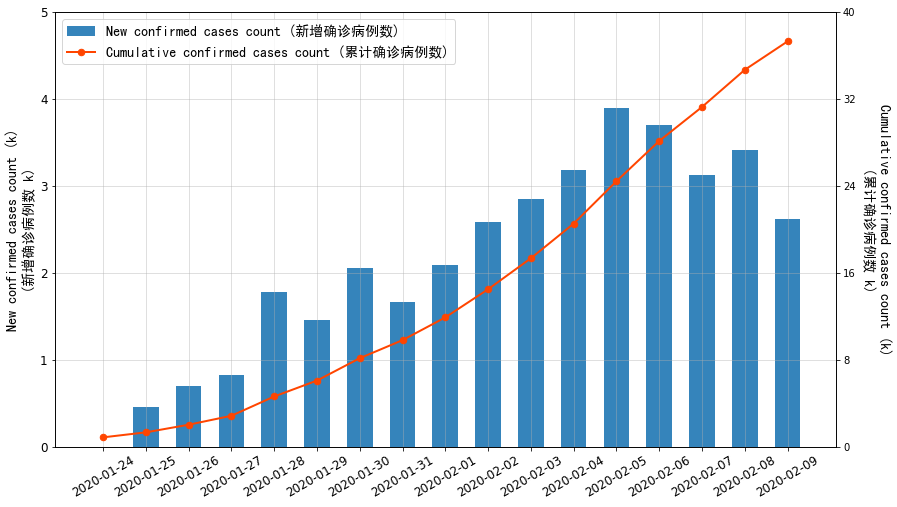

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))

bar_new_cfirmed = ax.bar(china_daily_last.index,
                         china_daily_last['province_confirmedCount_new'],
                         alpha=0.9,
                         width=0.6)

ax.tick_params(labelsize=12)
ax.set_xticklabels(china_daily_last.index, rotation=30)
ax.set_ylim(bottom=0, top=5000)
ax.set_ylabel('New confirmed cases count (k)\n(新增确诊病例数 k)', size=12, fontproperties=fontP)
ax.yaxis.set_major_formatter(formatter_thousands)
ax.grid(which='major', alpha=0.5)

ax_02 = ax.twinx()
line_cfirmed, = ax_02.plot(china_daily_last.index,
                      china_daily_last['province_confirmedCount'],
                      color='orangered',
                      linewidth=2,
                      marker='.',
                      markersize=13)
ax_02.set_xticks(china_daily_last.index)
ax_02.set_xticklabels(china_daily_last.index, rotation=30)
ax_02.set_ylim(bottom=0, top=40000)
ax_02.set_yticks(np.arange(0, 40001, 8000))
ax_02.set_ylabel('Cumulative confirmed cases count (k)\n(累计确诊病例数 k)', rotation=270,
                 labelpad=35, size=12, fontproperties=fontP)

ax_02.xaxis.set_major_formatter(DATESFMT)
ax_02.yaxis.set_major_formatter(formatter_thousands)

ax_02.legend(handles=(bar_new_cfirmed, line_cfirmed),
             fontsize=13,
             prop=fontP,
             labels=('New confirmed cases count (新增确诊病例数)',
                     'Cumulative confirmed cases count (累计确诊病例数)'),
             loc=2)

plt.show()

截至2020年2月9日24时，中国累计确诊新冠肺炎病例约37290例，较前一天增长2612例。需要注意的是，2020年2月5日的新增确诊病例量达到顶峰，如果按7-14天潜伏期来算，说明在1月24日与1月29日之间，感染新冠并处于潜伏期的人偏多。此时正值中国新年假期，人们走亲访友可能成为被传染的一个因素。但随后每日新增确诊人数开始下降，可以反映出1月底人们防范意识开始加强，降低了被传染的可能性。

### Cured count vs. Dead count

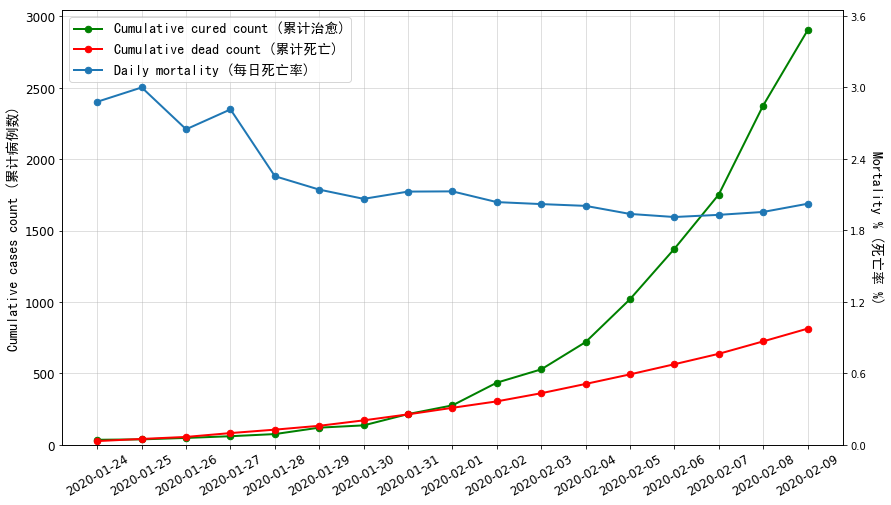

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))

line_cured, = ax.plot(china_daily_last.index,
                      china_daily_last['province_curedCount'],
                      color='green',
                      linewidth=2,
                      marker='.',
                      markersize=13)

line_dead, = ax.plot(china_daily_last.index,
                     china_daily_last['province_deadCount'],
                     color='red',
                     linewidth=2,
                     marker='.',
                     markersize=13)

ax.tick_params(labelsize=12)
ax.set_xticklabels(china_daily_last.index, rotation=30)
ax.set_ylim(bottom=0)
ax.set_ylabel('Cumulative cases count (累计病例数)', size=12, fontproperties=fontP)

ax.grid(which='major', alpha=0.5)

ax_02 = ax.twinx()
line_mortality_pct, = ax_02.plot(china_daily_last.index,
                                 china_daily_last['mortality_pct'],
                                 linewidth=2,
                                 marker='.',
                                 markersize=13)
ax_02.set_xticks(china_daily_last.index)
ax_02.set_xticklabels(china_daily_last.index, rotation=30)
ax_02.set_ylim(bottom=0, top=3.65)
ax_02.set_yticks(np.arange(0, 4, 0.6))
ax_02.set_ylabel('Mortality % (死亡率 %)', rotation=270, labelpad=18, size=12, fontproperties=fontP)

ax_02.xaxis.set_major_formatter(DATESFMT)

ax_02.legend(handles=(line_cured, line_dead, line_mortality_pct),
             fontsize=13,
             prop=fontP,
             labels=('Cumulative cured count (累计治愈)',
                     'Cumulative dead count (累计死亡)',
                     'Daily mortality (每日死亡率)'), loc=2)


plt.show()

截至2020年2月9日24时，中国累计治愈新冠肺炎病例2901例，累计死亡新冠肺炎病例813例。自2020年1月31日起，中国新冠肺炎病例治愈数量超过死亡数量。新冠肺炎死亡率于2020年1月30日由之前的2.3% - 3%降为2.1%，并趋于平稳，目前保持在2%左右。

## Per province

### Map

In [21]:
province_last_df = province_daily_last.groupby(['provinceName'])['Date_ymd'].max().reset_index()

for i, cols in province_last_df.iterrows():
    province_last_df.loc[i, 'Time_hms'] = province_daily_last[
        (province_daily_last['provinceName'] == cols['provinceName']) &
        (province_daily_last['Date_ymd'] == cols['Date_ymd'])]['Time_hms'].unique()[0]
    province_last_df.loc[i, 'province_confirmedCount'] = province_daily_last[
        (province_daily_last['provinceName'] == cols['provinceName']) &
        (province_daily_last['Date_ymd'] == cols['Date_ymd'])]['province_confirmedCount'].unique()[0]
    province_last_df.loc[i, 'province_suspectedCount'] = province_daily_last[
        (province_daily_last['provinceName'] == cols['provinceName']) &
        (province_daily_last['Date_ymd'] == cols['Date_ymd'])]['province_suspectedCount'].unique()[0]
    province_last_df.loc[i, 'province_curedCount'] = province_daily_last[
        (province_daily_last['provinceName'] == cols['provinceName']) &
        (province_daily_last['Date_ymd'] == cols['Date_ymd'])]['province_curedCount'].unique()[0]
    province_last_df.loc[i, 'province_deadCount'] = province_daily_last[
        (province_daily_last['provinceName'] == cols['provinceName']) &
        (province_daily_last['Date_ymd'] == cols['Date_ymd'])]['province_deadCount'].unique()[0]

# # Complete last data for 香港特别行政区', '台湾省'
# province_last_df.loc[len(province_last_df), 'provinceName'] = '香港特别行政区'
# province_last_df.loc[len(province_last_df)-1, 'Date_ymd'] = province_last_df.iloc[0, 1]
# province_last_df.loc[len(province_last_df)-1, 'Time_hms'] = province_last_df.iloc[0, 2]
# province_last_df.loc[len(province_last_df)-1, 'province_confirmedCount'] = 26
# province_last_df.loc[len(province_last_df)-1, 'province_deadCount'] = 1

# province_last_df.loc[len(province_last_df), 'provinceName'] = '台湾省'
# province_last_df.loc[len(province_last_df)-1, 'Date_ymd'] = province_last_df.iloc[0, 1]
# province_last_df.loc[len(province_last_df)-1, 'Time_hms'] = province_last_df.iloc[0, 2]
# province_last_df.loc[len(province_last_df)-1, 'province_confirmedCount'] = 17
# province_last_df.loc[len(province_last_df)-1, 'province_curedCount'] = 1

# province_last_df = province_last_df.fillna(0)

In [22]:
province_last_geo = pd.merge(province_last_df,
                             province_gdf[['name', 'geometry']],
                             left_on='provinceName',
                             right_on='name')
province_last_geo = province_last_geo.drop(columns='name')
province_last_geo = province_last_geo.dropna()

In [23]:
crs = {'init': 'epsg:4326'}
province_last_gdf = geopandas.GeoDataFrame(province_last_geo, crs=crs)

In [24]:
template_province = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">

<body> 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:16px; right: 20px; top: 20px;'>
     
<div class='legend-title'>Confirmed count<br>(确诊数量)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:#fdeed5;opacity:1;'></span>1 - 9</li>
    <li><span style='background:#f6a88e;opacity:1;'></span>10 - 99</li>
    <li><span style='background:#e86558;opacity:1;'></span>100 - 499</li>
    <li><span style='background:#d13035;opacity:1;'></span>500 - 999</li>
    <li><span style='background:#8c1f28;opacity:1;'></span>1000 - 10000</li>
    <li><span style='background:#59060a;opacity:1;'></span>> 10000</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

In [25]:
template_province_title = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">

<body>

<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:0px; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:25px; left: 60px; top: 0px;'>
<div class='legend-title'>Confirmed count per province (各省/直辖市/自治区确诊数量)</div>
<div class='legend-scale'><font size="3">China (中国) / Per province (各省/直辖市/自治区) / 2020-02-08</font></div>
</div>

</body>
</html>

{% endmacro %}"""

In [26]:
province_map = folium.Map(location=[36.130926, 106.925774],
                          zoom_start=4, tiles='cartodbpositron')

colormap_province = cm.StepColormap(
    colors=['#fdeed5', '#f6a88e', '#e86558',
            '#d13035', '#8c1f28', '#59060a'],
    vmin=min(province_last_gdf['province_confirmedCount']),
    vmax=max(province_last_gdf['province_confirmedCount']),
    index=[0, 9, 99, 499, 999, 10000, 100000000])

style_function = lambda x: {
    'fillColor': colormap_province(x['properties']['province_confirmedCount']),
    'color': '',
    'weight': 0.0001,
    'fillOpacity': 1
}

folium.GeoJson(
    province_last_gdf,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
            fields=['provinceName', 'province_confirmedCount'],
            aliases=['Province', 'Confirmed count'],
            localize=False
        ),
    name='confirmed').add_to(province_map)

folium.GeoJson(
    province_gdf,
    style_function = lambda x: {
        'color': 'black',
        'weight': 1.5,
        'fillOpacity': 0
    },
    name='Province').add_to(province_map)

folium.GeoJson(
    china_gdf,
    style_function = lambda x: {
        'color': 'black',
        'weight': 2.5,
        'fillOpacity': 0
    },
    name='China').add_to(province_map)

macro = MacroElement()
macro._template = Template(template_province)
macro2 = MacroElement()
macro2._template = Template(template_province_title)
province_map.get_root().add_child(macro)
province_map.get_root().add_child(macro2)

# province_map.save('province_20200208.html')

截止2020年2月8日，中国各省、直辖市、自治区中湖北省确诊病例最多，高达近25000例，其次为广东省和浙江省，均多于1000例；反之，西藏自治区只有1例确诊，且连续9天无新增病例。